In [ ]:
!pip install gymnasium

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 953.9/953.9 kB 11.4 MB/s eta 0:00:00


In [ ]:
!pip install gym_anytrading
verbose=0

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 172.2/172.2 kB 3.4 MB/s eta 0:00:00


info: {'total_reward': 68.09315490722656, 'total_profit': 0.4969024066430565, 'position': <Positions.Short: 0>}


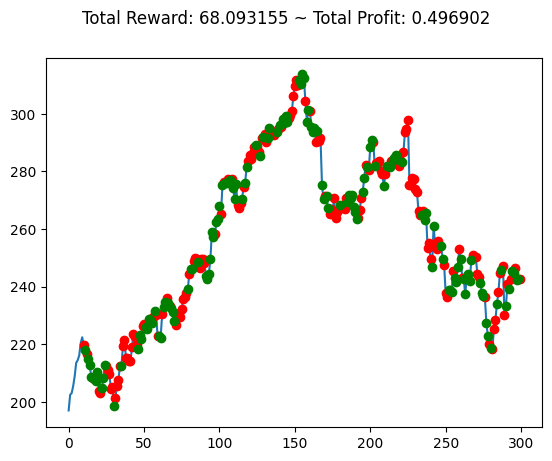

In [ ]:
# Test run

import gymnasium as gym
from gym_anytrading.datasets import STOCKS_GOOGL
import matplotlib.pyplot as plt

env = gym.make('stocks-v0',
        df=STOCKS_GOOGL,
        window_size=10,
        frame_bound=(10, 300)
    )

observation = env.reset(seed=2024)
while True:
    action = env.action_space.sample()
    observation, reward, terminated, truncated, info = env.step(action)
    done = terminated or truncated

    if done:
        print("info:", info)
        break

plt.cla()
env.unwrapped.render_all()
plt.show()

In [ ]:
env.action_space

Discrete(2)

In [ ]:
action = env.action_space.sample()
env.reset()
env.step(0)
env.step(1)
env.step(0)
a,b,c,d,info = env.step(action)
tuple(env.history['position'])

/usr/local/lib/python3.10/dist-packages/gymnasium/core.py:311: UserWarning: WARN: env.history to get variables from other wrappers is deprecated and will be removed in v1.0, to get this variable you can do `env.unwrapped.history` for environment variables or `env.get_wrapper_attr('history')` that will search the reminding wrappers.
  logger.warn(


(<Positions.Short: 0>,
 <Positions.Long: 1>,
 <Positions.Short: 0>,
 <Positions.Long: 1>)

In [ ]:
env.observation_space

Box(-10000000000.0, 10000000000.0, (10, 2), float32)

###DP

In [ ]:
def get_reward(env, action, done, actions_done, depth=0, max_depth=10):

  if done or depth>=max_depth:
    return 0

  observation, reward, terminated, truncated, info = env.step(action)
  done = terminated or truncated
  actions_done.append(action) #adding the performed action to the list

  print("actions done: ", actions_done)

  left = get_reward(env, 0, done, actions_done.copy(), depth+1, max_depth) #calculating max total reward when choosing action 0
  #sending copy as an argument to avoid clashes

  env.reset()
  for act in actions_done:
    env.step(act)
  #performing the pervious done actions as the env has now moved to the next actions


  right = get_reward(env, 1, done, actions_done.copy(), depth+1, max_depth) #calculating max reward when choosing action 1

  return reward + max(left, right) #outputting max reward


import gymnasium as gym
from gym_anytrading.datasets import STOCKS_GOOGL
import matplotlib.pyplot as plt

env = gym.make('stocks-v0',
        df=STOCKS_GOOGL,
        window_size=10,
        frame_bound=(10, 300)
    )

observation = env.reset()

actions_done = []


done = False

left = get_reward(env, 0, done, actions_done)

env.reset()
right = get_reward(env, 1, done, actions_done)

reward = max(left, right)

print(reward)

actions done:  [0]
actions done:  [0, 0]
actions done:  [0, 0, 0]
actions done:  [0, 0, 0, 0]
actions done:  [0, 0, 0, 0, 0]
actions done:  [0, 0, 0, 0, 0, 0]
actions done:  [0, 0, 0, 0, 0, 0, 0]
actions done:  [0, 0, 0, 0, 0, 0, 0, 0]
actions done:  [0, 0, 0, 0, 0, 0, 0, 0, 0]
actions done:  [0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
actions done:  [0, 0, 0, 0, 0, 0, 0, 0, 0, 1]
actions done:  [0, 0, 0, 0, 0, 0, 0, 0, 1]
actions done:  [0, 0, 0, 0, 0, 0, 0, 0, 1, 0]
actions done:  [0, 0, 0, 0, 0, 0, 0, 0, 1, 1]
actions done:  [0, 0, 0, 0, 0, 0, 0, 1]
actions done:  [0, 0, 0, 0, 0, 0, 0, 1, 0]
actions done:  [0, 0, 0, 0, 0, 0, 0, 1, 0, 0]
actions done:  [0, 0, 0, 0, 0, 0, 0, 1, 0, 1]
actions done:  [0, 0, 0, 0, 0, 0, 0, 1, 1]
actions done:  [0, 0, 0, 0, 0, 0, 0, 1, 1, 0]
actions done:  [0, 0, 0, 0, 0, 0, 0, 1, 1, 1]
actions done:  [0, 0, 0, 0, 0, 0, 1]
actions done:  [0, 0, 0, 0, 0, 0, 1, 0]
actions done:  [0, 0, 0, 0, 0, 0, 1, 0, 0]
actions done:  [0, 0, 0, 0, 0, 0, 1, 0, 0, 0]
actions done:  [0,

###Using DDPG Agents

In [ ]:
!pip install stable-baselines3

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 182.3/182.3 kB 3.3 MB/s eta 0:00:00


In [ ]:
from stable_baselines3 import DDPG, PPO
from stable_baselines3.common.vec_env import DummyVecEnv

In [ ]:
import gymnasium as gym
from gym_anytrading.datasets import STOCKS_GOOGL
import matplotlib.pyplot as plt

env = gym.make('stocks-v0',
        df=STOCKS_GOOGL,
        window_size=10,
        frame_bound=(10, 300)
    )

env.reset(seed=2020)

# env = DummyVecEnv([lambda: env])

model = PPO("MlpPolicy", env, verbose=0)

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [ ]:
PPO??

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [ ]:
env.observation_space

Box(-10000000000.0, 10000000000.0, (10, 2), float32)

In [ ]:
def train(env, model, total_num_episodes, total_learning_steps=10_000):
  # print(model)
  # print(model.policy)
  model.learn(total_timesteps=total_learning_steps)

  total_rewards = []

  for episode in range(total_num_episodes):
    reward_per_episode = 0;
    observation, _ = env.reset()

    done = False

    if episode%10==0:
      print(episode)

    while not done:
      action, _ = model.predict(observation)
      observation, reward, terminated, truncated, info = env.step(action)
      done = terminated or truncated

      reward_per_episode += reward

    total_rewards.append(reward_per_episode)

  return total_rewards

In [ ]:
import numpy as np
def values(reward):
  mean = np.mean(reward)
  min = np.min(reward)
  max = np.max(reward)
  print(f"mean: {mean}, min: {min}, max: {max}")

  return min,mean,max

In [ ]:
reward_episodes = train(env, model, 100)

0
10
20
30
40
50
60
70
80
90


In [ ]:
values(reward_episodes)

mean: 13.163968353271484, min: -58.49366760253906, max: 74.39434814453125


(-58.49366760253906, 13.163968353271484, 74.39434814453125)